<a href="https://colab.research.google.com/github/Usama-alt1/NLP/blob/main/News_Insight_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
!pip install transformers beautifulsoup4 requests

from bs4 import BeautifulSoup
import requests
from transformers import pipeline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")
sentiment_analyzer = pipeline("sentiment-analysis")

Device set to use cpu
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


In [37]:
def scrape_dawn_homepage(url="https://www.dawn.com/"):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    articles = []
    for article in soup.select('article.story'):
        title_tag = article.select_one('h2 a')
        if title_tag:
            title = title_tag.get_text(strip=True)
            link = title_tag['href']
            if not link.startswith('http'):
                link = "https://www.dawn.com" + link
            articles.append({"title": title, "url": link})

    return articles

In [38]:
def extract_article_text(article_url):
    try:
        response = requests.get(article_url)
        soup = BeautifulSoup(response.content, 'html.parser')
        paragraphs = soup.select('div.story__content p')
        content = ' '.join(p.get_text(strip=True) for p in paragraphs)
        return content
    except Exception as e:
        print(f"Error reading {article_url}: {e}")
        return ""

In [39]:
def summarize_text(text):
    try:
        if len(text) < 200:
            return "Too short to summarize"
        summary = summarizer(text[:1024], max_length=150, min_length=40, do_sample=False)
        return summary[0]['summary_text']
    except Exception as e:
        print("Summarization failed:", e)
        return "Summarization failed"

In [40]:
def analyze_sentiment(text):
    try:
        result = sentiment_analyzer(text)[0]
        return result['label']  # "POSITIVE" or "NEGATIVE"
    except Exception as e:
        print("Sentiment analysis failed:", e)
        return "Unknown"


📰 Found 106 articles... extracting and analyzing...


✅ Saved as 'dawn_news_summary_sentiment.csv'


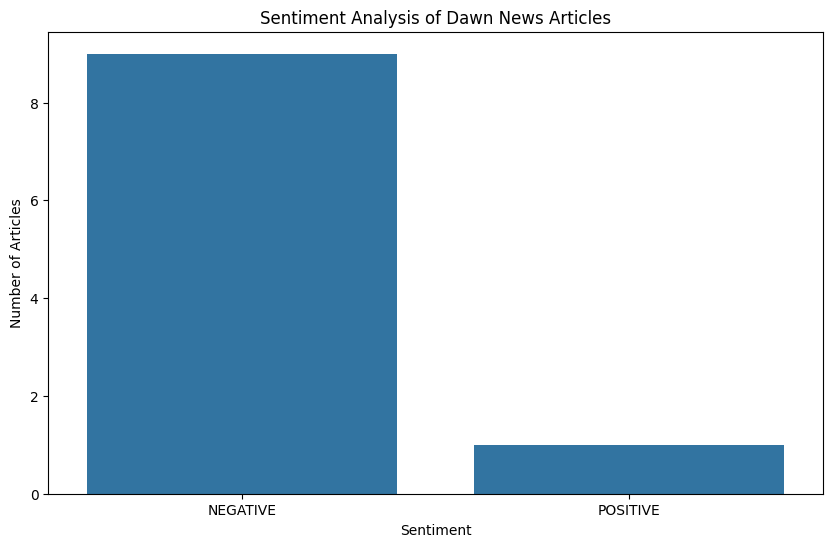

                                               Title  \
0  4-year-old boy killed in yet another accident ...   
1  No casualties reported as 5.5-magnitude quake ...   
2  Situation in Gaza now ‘absolutely catastrophic...   
3  Ban on gatherings imposed in Karachi’s Central...   
4  Punjab police arrest 5 suspects in Muzaffargar...   
5  Three villagers booked for hunting rare Himala...   
6  UN warns US aid cuts threaten millions of Afgh...   
7  Shangla DPO, his convoy remain unharmed in roa...   
8  Non-citizens in US asked to register, carry pr...   
9       Petrol, diesel prices likely to drop by Rs10   

                                                 URL  \
0  https://www.dawn.com/news/1903754/4-year-old-b...   
1  https://www.dawn.com/news/1903746/no-casualtie...   
2            https://www.dawn.com/live/gaza-invasion   
3  https://www.dawn.com/news/1903745/ban-on-gathe...   
4  https://www.dawn.com/news/1903749/punjab-polic...   
5  https://www.dawn.com/news/1903739/three-vill

In [41]:
def run_pipeline():
    news_data = scrape_dawn_homepage()
    print(f"\n📰 Found {len(news_data)} articles... extracting and analyzing...\n")
    results = []

    for article in news_data[:10]:
        title = article["title"]
        url = article["url"]
        full_text = extract_article_text(url)
        summary = summarize_text(full_text)
        sentiment = analyze_sentiment(summary)

        results.append({
            "Title": title,
            "URL": url,
            "Summary": summary,
            "Sentiment": sentiment
        })

    df = pd.DataFrame(results)
    df.to_csv("dawn_news_summary_sentiment.csv", index=False)
    print("\n✅ Saved as 'dawn_news_summary_sentiment.csv'")

    plt.figure(figsize=(10, 6))
    sns.countplot(x='Sentiment', data=df)
    plt.title('Sentiment Analysis of Dawn News Articles')
    plt.xlabel('Sentiment')
    plt.ylabel('Number of Articles')
    plt.savefig('sentiment_analysis_plot.png')  # Save the plot as a PNG file
    plt.show()

    # Display the DataFrame with the added 'Sentiment' column
    print(df)

run_pipeline()


In [42]:
from google.colab import files
files.download('dawn_news_summaries.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [45]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.2 MB/s eta 0:00:00


2025-04-12 12:24:35.951 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-12 12:24:35.954 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-12 12:24:35.955 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-12 12:24:35.959 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-12 12:24:35.962 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-12 12:24:35.963 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-12 12:24:35.966 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-12 12:24:35.967 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

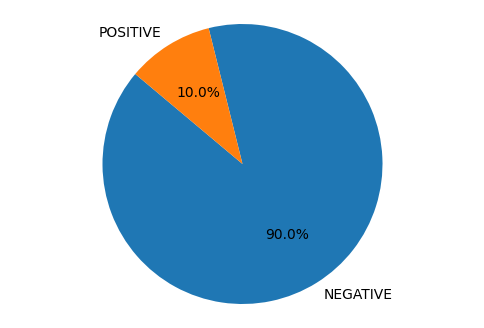

In [49]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV
df = pd.read_csv("dawn_news_summary_sentiment.csv")

# Title
st.title("📰 News Summary Dashboard")

# Search box
query = st.text_input("Search News:")

if query:
    # Assuming 'headline' column exists, if not, replace with the actual column name
    df = df[df['Title'].str.contains(query, case=False)]

# Filter by sentiment
# Access the 'Sentiment' column using its actual case from the CSV
sentiment_filter = st.selectbox("Filter by Sentiment", ['All'] + df['Sentiment'].unique().tolist())
if sentiment_filter != 'All':
    # Use the correct case for 'Sentiment' column here as well
    df = df[df['Sentiment'] == sentiment_filter]

# Display table
# Assuming 'headline', 'summary', 'sentiment' columns exist,
# replace with actual column names if different
st.dataframe(df[['Title', 'Summary', 'Sentiment']])

# Plot sentiment distribution
st.subheader("Sentiment Distribution")
# Use the correct case for 'Sentiment' column
sent_counts = df['Sentiment'].value_counts()
plt.figure(figsize=(6,4))
plt.pie(sent_counts, labels=sent_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
st.pyplot(plt)